# Capstone Project - The Battle of Neighborhoods (London)

## Topic: Finding the best place to build a student hall in London

### Date: 27 March 2019
### Author: Min Jung Kang

#### 1. Description of the Problem

London is a popular destination for higher education where diverse students from all around the world gather to study.

According to the data published by the Higher Education Statistical Agency (HESA), in the academic year 2016-2017 London welcomed 112,200 international students to its higher education institutions, which make up 29 percent of students at higher education institutions.

One of the big concerns for international students when moving to a new city would be finding an accommodation. Student halls are the most reliable means of housing for students, but it is not easy to secure a place in one as they are in high demand. Therefore in this project, I intend to **explore different neighborhoods of London and find the best area to build a new student hall for international students in London** to solve this persistent problem and to find a new business opportunity.This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in London.      

From the student perspective, a lot of factors come into play when finding the best accommodation, including location and rent. Howerver, this study will focus only on **the safety and the general atmosphere of the neighborhood.** Distance to universities are also an important factor in choosing a student hall, but as student halls accept students from different universities, it will be disregarded in this project.   

#### 2. Data Acquisition and Preprocessing
In this project, I will be using the following datasets to help solve my problem - London Recorded Crime, List of London Boroughs, and Foursquare API.   
Let's have a look at them.

**a. London Recorded Crime : Geographic Breakdown**   
* London crime records by boroughs in the last 24 months   
* source: London Datastore   
* url: https://data.london.gov.uk/dataset/recorded_crime_summary

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read crime records data
crime = pd.read_csv(r"D:\Data_Science_projects\ibm\MPS Borough Level Crime (most recent 24 months).csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201806,201807,201808,201809,201810,201811,201812,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,...,7,7,10,12,3,13,4,6,11,11


In [3]:
crime=crime.rename(columns={'LookUp_BoroughName':'BoroughName'})

In [4]:
# Dimension of Data
crime.shape

(1566, 27)

In [5]:
crime.head()

,MajorText,MinorText,BoroughName,201806,201807,201808,201809,201810,201811,201812,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,...,7,7,10,12,3,13,4,6,11,11


In [6]:
# Names of Boroughs
crime['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [7]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,BoroughName,Sum,201806,201807,201808,201809,201810,201811,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,127,12,6,5,3,8,5,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2691,123,127,101,107,132,105,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,700,33,30,18,33,32,39,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,2337,77,94,84,99,94,106,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,177,6,8,7,10,7,7,...,7,7,10,12,3,13,4,6,11,11


In [8]:
# Delete unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,BoroughName,Sum
0,Barking and Dagenham,127
1,Barking and Dagenham,2691
2,Barking and Dagenham,700
3,Barking and Dagenham,2337
4,Barking and Dagenham,177


In [9]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['BoroughName'], as_index=False).sum()
crime.head()

,BoroughName,Sum
0,Barking and Dagenham,38713
1,Barnet,59484
2,Bexley,33832
3,Brent,60193
4,Bromley,47930


In [10]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1613.041667
1,Barnet,2478.500000
2,Bexley,1409.666667
3,Brent,2508.041667
4,Bromley,1997.083333


In [11]:
# Explore the clean dataset - borough with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,MonthlyAverage
32,Westminster,6009.166667
27,Southwark,3088.875000
5,Camden,3070.500000
24,Newham,2946.083333
20,Lambeth,2885.750000


In [12]:
### Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head()

,BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,269.958333
19,Kingston upon Thames,1054.625000
26,Richmond upon Thames,1058.750000
28,Sutton,1117.750000
23,Merton,1171.458333


**b. List of London Boroughs**   
* Information on boroughs and their population & coordinates   
 -Population can be used to calcuate the ratio of reported crime to population for better comparison.   
 -Coordinates can be used to get neighborhood data from Foursquare.   
* source: Wikipedia   
* url: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [13]:
import requests
import lxml
from bs4 import BeautifulSoup

In [14]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1d3546c7-e7ab-4add-a711-fcb35c1501f0","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [15]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [16]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [17]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [18]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [19]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [20]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [21]:
info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

**c. Foursquare API**   
* List of top 50 popular places in the neighborhood
* source: Foursquare
* url: https://api.foursquare.com

In [22]:
# Foursquare credentials
CLIENT_ID = 'CGDKJ2HIL4UFRWWCVTMNEC2UK1ROTM5XKZOCIXTJ2KK4AG0O'# your Foursquare ID
CLIENT_SECRET = 'XJIQLHPXT2FWPNMUMMV0JKEAWLHUKGXZW4G3EUVCPNHPTVNC'# your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [23]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [25]:
print(venues.shape)
venues.head()

(1129, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket


#### 3. Methodology
In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

**a. Exploratory Analysis**

In [26]:
#Review our data
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1613.041667
1,Barnet,2478.500000
2,Bexley,1409.666667
3,Brent,2508.041667
4,Bromley,1997.083333


In [27]:
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [28]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket


In [29]:
import matplotlib.pyplot as plt

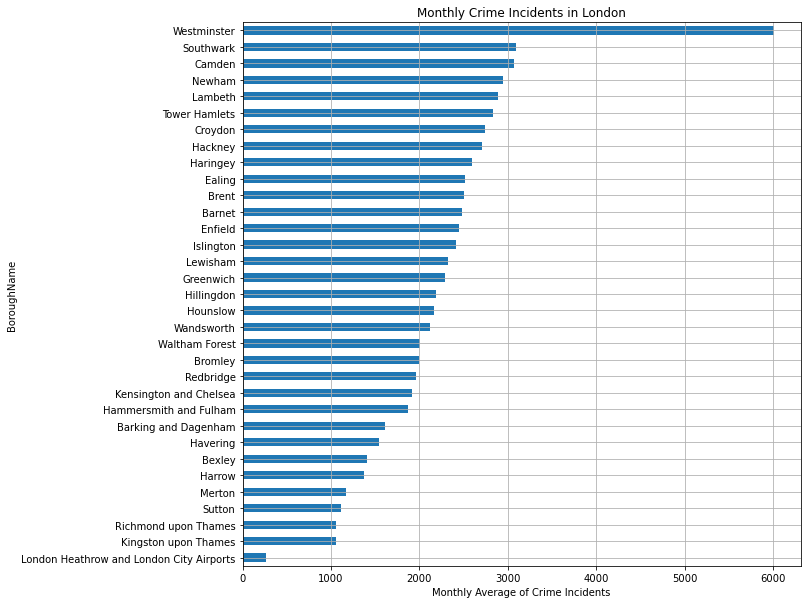

In [30]:
#Visualize crime data
crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

Westminster has the biggest number of reported crime, followed by Camden, Newham and Southwark.

In [31]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
crime.drop([22], inplace=True)

In [32]:
#Combine crime data and borough information data
df = pd.merge(crime,info, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1613.041667,194352,51.5607,0.1557
1,Barnet,2478.500000,369088,51.6252,-0.1517
2,Bexley,1409.666667,236687,51.4549,0.1505
3,Brent,2508.041667,317264,51.5588,-0.2817
4,Bromley,1997.083333,317899,51.4039,0.0198


In [33]:
#Check data type
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [34]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [35]:
df.shape

(32, 5)

In [36]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1613.041667,194352,51.5607,0.1557,8.299589
1,Barnet,2478.500000,369088,51.6252,-0.1517,6.715201
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826
3,Brent,2508.041667,317264,51.5588,-0.2817,7.905220
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132


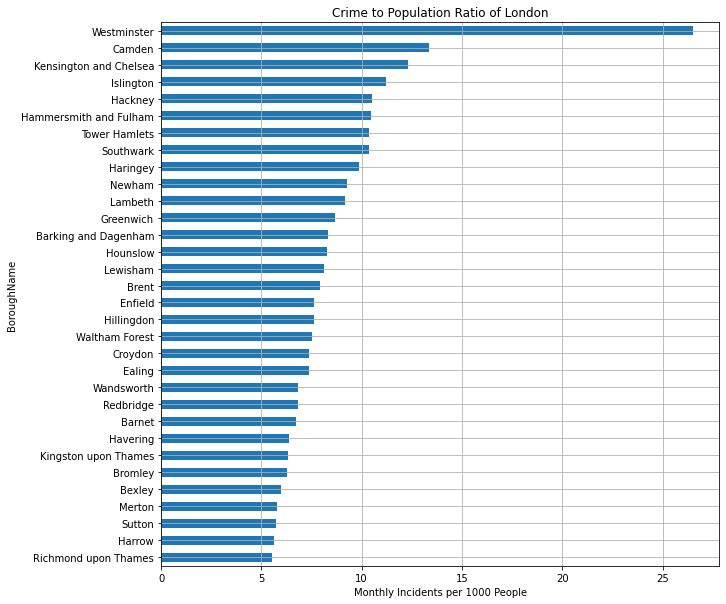

In [37]:
#Visualize crime per 1000 people
df.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [38]:
import folium
from geopy.geocoders import Nominatim

In [39]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 51.5073219, -0.1276474.


In [40]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

We can see that Westminster and Camden still remains top 2 dangerous area even after taking population into consideration.

**b. Cluster Analysis**   
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [41]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 179 uniques categories.


In [42]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [43]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
onehot.shape

(1129, 180)

In [45]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
2,Bexley,0.00000,0.000000,0.000000,0.000000,0.033333,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.033333,0.000000,0.033333,0.00,0.00,0.00,0.000000,0.000000
3,Brent,0.00000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.00,0.020000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
4,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.025641,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
5,Camden,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.000000,...,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
6,Croydon,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.027027,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
7,Ealing,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.000000,...,0.00,0.000000,0.020000,0.040000,0.000000,0.02,0.00,0.00,0.000000,0.000000
8,Enfield,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.020408,0.000000,0.000000,0.00,0.00,0.00,0.020408,0.000000
9,Greenwich,0.02439,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.024390,...,0.00,0.000000,0.000000,0.024390,0.024390,0.00,0.00,0.00,0.000000,0.000000


In [46]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Pool  0.14
1     Martial Arts Dojo  0.14
2           Supermarket  0.14
3           Golf Course  0.14
4  Gym / Fitness Center  0.14


----Barnet----
                venue  freq
0                Café  0.67
1            Bus Stop  0.33
2  African Restaurant  0.00
3                Park  0.00
4        Optical Shop  0.00


----Bexley----
                  venue  freq
0                   Pub  0.10
1           Coffee Shop  0.10
2        Clothing Store  0.10
3  Fast Food Restaurant  0.07
4              Pharmacy  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.08
3        Grocery Store  0.06
4  Sporting Goods Shop  0.04


----Bromley----
                  venue  freq
0        Clothing Store  0.13
1           Coffee Shop  0.13
2           Pizza Place  0.05
3                   Bar  0.05
4  Gym / Fitness Center  0.05


----Camden----
    

In [47]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Park,Golf Course,Gym / Fitness Center,Martial Arts Dojo,Electronics Store,Fish Market,Film Studio
1,Barnet,Café,Bus Stop,Yoga Studio,Gaming Cafe,French Restaurant,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,Bexley,Coffee Shop,Clothing Store,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Pharmacy,Bakery,Sandwich Place,Furniture / Home Store
3,Brent,Coffee Shop,Hotel,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Sporting Goods Shop,Bar,Hotel Bar,Bubble Tea Shop
4,Bromley,Clothing Store,Coffee Shop,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,Electronics Store,Cosmetics Shop,Portuguese Restaurant,Pub


In [48]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [49]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10] 

array([0, 3, 2, 1, 2, 1, 1, 1, 2, 2])

In [50]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1613.041667,194352,51.5607,0.1557,8.299589,0,Pool,Bus Station,Supermarket,Park,Golf Course,Gym / Fitness Center,Martial Arts Dojo,Electronics Store,Fish Market,Film Studio
1,Barnet,2478.500000,369088,51.6252,-0.1517,6.715201,3,Café,Bus Stop,Yoga Studio,Gaming Cafe,French Restaurant,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,2,Coffee Shop,Clothing Store,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Pharmacy,Bakery,Sandwich Place,Furniture / Home Store
3,Brent,2508.041667,317264,51.5588,-0.2817,7.905220,1,Coffee Shop,Hotel,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Sporting Goods Shop,Bar,Hotel Bar,Bubble Tea Shop
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132,2,Clothing Store,Coffee Shop,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,Electronics Store,Cosmetics Shop,Portuguese Restaurant,Pub


In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's observe each clusters and name them according to their characteristics

In [52]:
# Cluster 0: Healthy area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,8.299589,0,Pool,Bus Station,Supermarket,Park,Golf Course,Gym / Fitness Center,Martial Arts Dojo,Electronics Store,Fish Market,Film Studio
12,Haringey,9.860528,0,Park,Café,Fast Food Restaurant,Grocery Store,Mediterranean Restaurant,Movie Theater,Bar,Bakery,Gym / Fitness Center,Turkish Restaurant
13,Harrow,5.652526,0,Indie Movie Theater,Indian Restaurant,Coffee Shop,Supermarket,Fast Food Restaurant,Grocery Store,Yoga Studio,English Restaurant,Food Court,Flea Market
22,Merton,5.764398,0,Italian Restaurant,Café,Supermarket,Bus Stop,Park,Garden Center,Grocery Store,Bar,Bakery,Coffee Shop


In [53]:
# Cluster 1: Lively area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,7.905220,1,Coffee Shop,Hotel,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Sporting Goods Shop,Bar,Hotel Bar,Bubble Tea Shop
5,Camden,13.366330,1,Hotel,Coffee Shop,Café,Burger Joint,Train Station,Pizza Place,Garden,Breakfast Spot,Deli / Bodega,Used Bookstore
6,Croydon,7.357998,1,Pub,Coffee Shop,Portuguese Restaurant,Hotel Bar,Sandwich Place,Malay Restaurant,Gaming Cafe,Burger Joint,Burrito Place,Mediterranean Restaurant
7,Ealing,7.357915,1,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,Burger Joint,Vietnamese Restaurant,Park,Pub,Polish Restaurant,Sandwich Place
10,Hackney,10.536505,1,Pub,Coffee Shop,Café,Bakery,Vegetarian / Vegan Restaurant,Brewery,Modern European Restaurant,Cocktail Bar,Grocery Store,Hotel
11,Hammersmith and Fulham,10.477470,1,Pub,Indian Restaurant,Italian Restaurant,Café,Clothing Store,Japanese Restaurant,Vietnamese Restaurant,Gastropub,Jazz Club,Pharmacy
17,Islington,11.201876,1,Pub,Bakery,Mediterranean Restaurant,Boutique,Theater,Burger Joint,Music Venue,Ice Cream Shop,Liquor Store,Gift Shop
20,Lambeth,9.183209,1,Caribbean Restaurant,Market,Pub,Pizza Place,Cocktail Bar,Tapas Restaurant,Restaurant,Beer Bar,BBQ Joint,Indian Restaurant
23,Newham,9.257804,1,Hotel,Airport Service,Chinese Restaurant,Airport,Airport Lounge,Pharmacy,Rafting,Light Rail Station,Sandwich Place,Yoga Studio
25,Richmond upon Thames,5.532621,1,Pub,Coffee Shop,Italian Restaurant,Indian Restaurant,Grocery Store,Steakhouse,Pharmacy,Mediterranean Restaurant,Gastropub,Portuguese Restaurant


In [54]:
# Cluster 2: Busy area (Coffee shops, Clothing stores)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,5.955826,2,Coffee Shop,Clothing Store,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Pharmacy,Bakery,Sandwich Place,Furniture / Home Store
4,Bromley,6.282132,2,Clothing Store,Coffee Shop,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,Electronics Store,Cosmetics Shop,Portuguese Restaurant,Pub
8,Enfield,7.626444,2,Coffee Shop,Clothing Store,Optical Shop,Pub,Pharmacy,Sandwich Place,Shopping Mall,Bookstore,Supermarket,Café
9,Greenwich,8.658986,2,Pub,Coffee Shop,Fast Food Restaurant,Clothing Store,Sandwich Place,Hotel,Grocery Store,Pharmacy,Supermarket,Platform
14,Havering,6.352411,2,Coffee Shop,Shopping Mall,Clothing Store,Bakery,Fast Food Restaurant,Bookstore,Supermarket,Pub,Café,Department Store
15,Hillingdon,7.607349,2,Coffee Shop,Italian Restaurant,Clothing Store,Pharmacy,Fast Food Restaurant,Pizza Place,Burger Joint,Sandwich Place,Toy / Game Store,Multiplex
18,Kensington and Chelsea,12.297229,2,Juice Bar,Café,Clothing Store,Bakery,Restaurant,Burger Joint,Breakfast Spot,Gym / Fitness Center,Pub,Modern European Restaurant
19,Kingston upon Thames,6.322957,2,Café,Coffee Shop,Italian Restaurant,Pub,Burger Joint,Department Store,Thai Restaurant,Sushi Restaurant,Clothing Store,Portuguese Restaurant
21,Lewisham,8.114794,2,Supermarket,Grocery Store,Coffee Shop,Italian Restaurant,Platform,Train Station,Greek Restaurant,Shopping Mall,Sandwich Place,Fast Food Restaurant
24,Redbridge,6.820815,2,Clothing Store,Supermarket,Fast Food Restaurant,Department Store,Sandwich Place,Coffee Shop,Grocery Store,Bakery,Shoe Store,Buffet


In [55]:
# Cluster 3: Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.715201,3,Café,Bus Stop,Yoga Studio,Gaming Cafe,French Restaurant,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


In [56]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.267691,4,Pizza Place,Café,Park,Metro Station,Yoga Studio,Event Space,Food Court,Flea Market,Fish Market,Film Studio


#### 4. Results & Recommendation

Now we will review all the analysis made in this project before we make a conclusion on which area to live as an international student or invest as a student accommodation builder.   

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.   

**a. Safety**   
Safety can be determined by the criminal rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.

In [57]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,BoroughName,CrimeToPop,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,26.490655,6009.166667,226841,51.4973,-0.1372,1,Coffee Shop,Hotel,Theater,Sandwich Place,Juice Bar,Sporting Goods Shop,Sushi Restaurant,Hotel Bar,Art Gallery,Street Food Gathering
5,Camden,13.366330,3070.500000,229719,51.5290,-0.1255,1,Hotel,Coffee Shop,Café,Burger Joint,Train Station,Pizza Place,Garden,Breakfast Spot,Deli / Bodega,Used Bookstore
18,Kensington and Chelsea,12.297229,1913.375000,155594,51.5020,-0.1947,2,Juice Bar,Café,Clothing Store,Bakery,Restaurant,Burger Joint,Breakfast Spot,Gym / Fitness Center,Pub,Modern European Restaurant
17,Islington,11.201876,2415.875000,215667,51.5416,-0.1022,1,Pub,Bakery,Mediterranean Restaurant,Boutique,Theater,Burger Joint,Music Venue,Ice Cream Shop,Liquor Store,Gift Shop
10,Hackney,10.536505,2711.875000,257379,51.5450,-0.0553,1,Pub,Coffee Shop,Café,Bakery,Vegetarian / Vegan Restaurant,Brewery,Modern European Restaurant,Cocktail Bar,Grocery Store,Hotel
11,Hammersmith and Fulham,10.477470,1872.166667,178685,51.4927,-0.2339,1,Pub,Indian Restaurant,Italian Restaurant,Café,Clothing Store,Japanese Restaurant,Vietnamese Restaurant,Gastropub,Jazz Club,Pharmacy
28,Tower Hamlets,10.358875,2826.833333,272890,51.5099,-0.0059,1,Hotel,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Convenience Store,Chinese Restaurant,Sandwich Place,Outdoor Sculpture,Café,Bus Stop
26,Southwark,10.349238,3088.875000,298464,51.5035,-0.0804,1,Coffee Shop,Pub,Hotel,Hotel Bar,Art Gallery,Cocktail Bar,Theater,English Restaurant,Bar,Gym / Fitness Center
12,Haringey,9.860528,2597.125000,263386,51.6000,-0.1119,0,Park,Café,Fast Food Restaurant,Grocery Store,Mediterranean Restaurant,Movie Theater,Bar,Bakery,Gym / Fitness Center,Turkish Restaurant
23,Newham,9.257804,2946.083333,318227,51.5077,0.0469,1,Hotel,Airport Service,Chinese Restaurant,Airport,Airport Lounge,Pharmacy,Rafting,Light Rail Station,Sandwich Place,Yoga Studio


**b. Atmosphere**   
And from the cluster analysis made above, we will give each clusters a name according to the characteristics inferrable from the popular venues.

According to my interpretation, **Cluster 0** is **'Healthy Area'** with gyms, parks, pools and golf courses as popular places.

In [58]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Barking and Dagenham', 'Haringey', 'Harrow', 'Merton'],
      dtype=object)

According to my interpretation, **Cluster 1** is **'Lively Area'** with many pubs and restaurants.

In [59]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Brent', 'Camden', 'Croydon', 'Ealing', 'Hackney',
       'Hammersmith and Fulham', 'Islington', 'Lambeth', 'Newham',
       'Richmond upon Thames', 'Southwark', 'Tower Hamlets',
       'Waltham Forest', 'Westminster'], dtype=object)

According to my interpretation, **Cluster 2** is **'Busy Area'** with many coffee shops and clothing stores.

In [60]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Bexley', 'Bromley', 'Enfield', 'Greenwich', 'Havering',
       'Hillingdon', 'Kensington and Chelsea', 'Kingston upon Thames',
       'Lewisham', 'Redbridge', 'Sutton', 'Wandsworth'], dtype=object)

According to my interpretation, **Cluster 3** is **'Quiet Area'** with cafe, bus stop, and yoga studio as top venues.

In [61]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Barnet'], dtype=object)

According to my interpretation, **Cluster 4** is **'Traveller Area'** with bed & breakfast, hotels, and airport.

In [62]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Hounslow'], dtype=object)

Now, what kind of atmosphere students may prefer differ by every student. So using my personal preferance as a student moving to London and some common sense, I will give scores to each clusters.   
I have decided to give preference in the order of Busy Area, Lively Area, Healthy Area, Quiet Area, and Traveller Area.

**c. Weighted score table**   
Finally, let's calculate the scores of each borough.

In [63]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

,BoroughName,CrimeToPop,Cluster Labels
0,Barking and Dagenham,8.299589,0
1,Barnet,6.715201,3
2,Bexley,5.955826,2
3,Brent,7.905220,1
4,Bromley,6.282132,2


In [64]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barking and Dagenham,8.299589,0,0.867976
1,Barnet,6.715201,3,0.943574
2,Bexley,5.955826,2,0.979807
3,Brent,7.905220,1,0.886793
4,Bromley,6.282132,2,0.964238


In [65]:
score['Atmosphere'] = 0
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.299589,0,0.867976,0
1,Barnet,6.715201,3,0.943574,0
2,Bexley,5.955826,2,0.979807,0
3,Brent,7.905220,1,0.886793,0
4,Bromley,6.282132,2,0.964238,0


In [66]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.299589,0.8,0.867976,0.0
1,Barnet,6.715201,3.0,0.943574,0.7
2,Bexley,5.955826,2.0,0.979807,1.0
3,Brent,7.905220,1.0,0.886793,0.9
4,Bromley,6.282132,2.0,0.964238,1.0


In [67]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Atmosphere,Score
27,Sutton,0.991760,1.0,1.991760
2,Bexley,0.979807,1.0,1.979807
4,Bromley,0.964238,1.0,1.964238
19,Kingston upon Thames,0.962290,1.0,1.962290
14,Havering,0.960884,1.0,1.960884
24,Redbridge,0.938535,1.0,1.938535
30,Wandsworth,0.937672,1.0,1.937672
15,Hillingdon,0.901006,1.0,1.901006
8,Enfield,0.900094,1.0,1.900094
25,Richmond upon Thames,1.000000,0.9,1.900000


#### 5. Conclusion

From our analysis, we have found that the five boroughs below are the best places to build a student hall, based on safety and atmosphere of the neighborhood.
The top five boroughs all belong to the Busy Area cluster, with many coffee shops and clothing stores. Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.

In [68]:
df_top5 = df.iloc[[13,27,2,22,19],:]
df_top5

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
13,Harrow,1375.666667,243372,51.5898,-0.3346,5.652526
27,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826
22,Merton,1171.458333,203223,51.4014,-0.1958,5.764398
19,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957


In [69]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

**Limitations**   
However, it obviously seems strange that the best places to live in Loondon are all far out suburbs.
This is due to limitations this research holds. Among numerous factors that determine a good neighborhood, we only took into consideration what type of venues are popular and how many crime incidents are recorded for the sake of simplification. This means that serious crimes like homicide was treated the same as a comparatively petty crime like shoplifting. Moreover, the number of stores in the neighborhood may be as important as what type of stores there are.

To overcome the limitations of this study, we will need further data such as distance to city center and housing prices. Also, taking crime categories into factor and weighting them differently may be helpful. Nevertheless, this research was still meaningful in that we were able to explore the neighborhoods in depth.